## Group Project

In [65]:
#census tracts shape file
import geopandas as gpd
import os
import pandas as pd


In [66]:
# def region_percentage(text):
#     if text == 'SouthWest':
#         return 39.12
#     elif text == 'SouthEast':
#         return 36.21
#     elif text == 'MidWest':
#         return 30.4
#     elif text == 'Pacific':
#         return 28.39
#     elif text == 'NonContiguous':
#         return 20.48
#     elif text == 'District':
#         return 30.16
#     elif text == 'NorthEast':
#         return 18.49
#     elif text == 'RockyMountains':
#         return 29.02
    

In [67]:
d = {'Region': ['SouthWest', 'SouthEast', 'MidWest', 'Pacific', 'NonContiguous', 'DC', 'NorthEast', 'RockyMountains'], 'Percentage': [39.12, 36.21, 30.4, 28.39, 20.48, 30.16, 18.49, 29.02]}

In [68]:
regions_df = pd.DataFrame(data = d)

In [69]:
regions_df

,Region,Percentage
0,SouthWest,39.12
1,SouthEast,36.21
2,MidWest,30.40
3,Pacific,28.39
4,NonContiguous,20.48
5,DC,30.16
6,NorthEast,18.49
7,RockyMountains,29.02


In [70]:
import altair as alt

In [71]:
selection = alt.selection_single()

In [72]:
regions_chart = alt.Chart(regions_df).mark_bar().encode(
    # encode x as the percent, and hide the axis
    x = alt.X('Percentage:Q', title = "Percentage of Food Tracks"),
    y=alt.Y('Region'),
    tooltip = [alt.Tooltip('Percentage:Q'),
               alt.Tooltip('Region:N')
              ],
    color=alt.condition(selection, 'Percentage:Q', alt.value('grey'))
).add_selection(selection)

In [73]:
regions_chart

alt.Chart(...)

In [74]:
food_atlas2019 = pd.read_excel('FoodAccessResearchAtlasData2019.xlsx', sheet_name = 'Food Access Research Atlas')

In [75]:
food_atlas2015 = pd.read_excel('FoodAccessResearchAtlasData2015.xlsx', sheet_name = 'Food Access Research Atlas')

In [76]:
census_tracts2019 = gpd.read_file(r'cb_2019_us_tract_500k.shx')

In [77]:
census_tracts2019.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
AFFGEOID      object
GEOID         object
NAME          object
LSAD          object
ALAND          int64
AWATER         int64
geometry    geometry
dtype: object

In [78]:
census_tracts2019

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,34,005,702808,1400000US34005702808,34005702808,7028.08,CT,1510553,0,"POLYGON ((-74.90801 40.03250, -74.90496 40.036..."
1,39,153,504200,1400000US39153504200,39153504200,5042,CT,808151,0,"POLYGON ((-81.51807 41.05957, -81.51805 41.062..."
2,36,071,000502,1400000US36071000502,36071000502,5.02,CT,967431,969216,"POLYGON ((-74.02226 41.49281, -74.02180 41.496..."
3,06,013,370000,1400000US06013370000,06013370000,3700,CT,999356,0,"POLYGON ((-122.32697 37.93502, -122.32610 37.9..."
4,48,113,019204,1400000US48113019204,48113019204,192.04,CT,2851229,9966,"POLYGON ((-96.76902 32.94655, -96.76899 32.950..."
...,...,...,...,...,...,...,...,...,...,...
73863,48,245,011303,1400000US48245011303,48245011303,113.03,CT,155358411,14272444,"POLYGON ((-94.28353 29.88008, -94.26230 29.910..."
73864,01,073,012302,1400000US01073012302,01073012302,123.02,CT,168942340,1269965,"POLYGON ((-87.16295 33.49312, -87.16185 33.495..."
73865,72,113,072400,1400000US72113072400,72113072400,724,CT,11230767,184996,"POLYGON ((-66.58227 18.03935, -66.58177 18.039..."
73866,06,081,608023,1400000US06081608023,06081608023,6080.23,CT,805954,119028,"POLYGON ((-122.27898 37.54565, -122.27590 37.5..."


In [79]:
census_tracts2019.sort_values(by='GEOID')

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
42627,01,001,020100,1400000US01001020100,01001020100,201,CT,9817813,28435,"POLYGON ((-86.50916 32.47344, -86.50620 32.475..."
63036,01,001,020200,1400000US01001020200,01001020200,202,CT,3325680,5669,"POLYGON ((-86.48093 32.48154, -86.47945 32.485..."
54564,01,001,020300,1400000US01001020300,01001020300,203,CT,5349273,9054,"POLYGON ((-86.47087 32.47573, -86.46964 32.478..."
7300,01,001,020400,1400000US01001020400,01001020400,204,CT,6384276,8408,"POLYGON ((-86.45394 32.49318, -86.45308 32.493..."
69399,01,001,020500,1400000US01001020500,01001020500,205,CT,11408866,43534,"POLYGON ((-86.43816 32.45069, -86.43773 32.451..."
...,...,...,...,...,...,...,...,...,...,...
51602,78,030,960900,1400000US78030960900,78030960900,9609,CT,8151326,3040068,"MULTIPOLYGON (((-64.89822 18.27758, -64.89801 ..."
29694,78,030,961000,1400000US78030961000,78030961000,9610,CT,2105263,2358459,"MULTIPOLYGON (((-64.93931 18.33376, -64.93751 ..."
36078,78,030,961100,1400000US78030961100,78030961100,9611,CT,3513675,0,"POLYGON ((-64.92480 18.33123, -64.92477 18.331..."
29695,78,030,961200,1400000US78030961200,78030961200,9612,CT,1017756,802134,"POLYGON ((-64.93271 18.34782, -64.93187 18.348..."


In [80]:
census_tracts['geometry'].unique()

<GeometryArray>
 ...
Length: 73868, dtype: geometry

In [81]:
food_atlas2019.dtypes

CensusTract        int64
State             object
County            object
Urban              int64
Pop2010            int64
                  ...   
TractAIAN        float64
TractOMultir     float64
TractHispanic    float64
TractHUNV        float64
TractSNAP        float64
Length: 147, dtype: object

In [82]:
food_atlas2019

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.000000,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.341014,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.000000,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.000000,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.681219,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,56043000200,Wyoming,Washakie County,0,3326,1317,0,57.0,1.713770,0,...,593.0,3106.0,6.0,15.0,0.0,27.0,172.0,309.0,61.0,64.0
72527,56043000301,Wyoming,Washakie County,1,2665,1154,0,10.0,0.375235,0,...,399.0,2377.0,5.0,23.0,0.0,40.0,220.0,446.0,88.0,41.0
72528,56043000302,Wyoming,Washakie County,1,2542,1021,0,73.0,2.871755,0,...,516.0,2312.0,11.0,10.0,1.0,26.0,182.0,407.0,23.0,64.0
72529,56045951100,Wyoming,Weston County,0,3314,1322,0,252.0,7.604104,0,...,499.0,3179.0,15.0,10.0,1.0,47.0,62.0,91.0,47.0,34.0


In [83]:
census_tracts2019['GEOID'] = pd.to_numeric(
    census_tracts2019['GEOID'])

In [84]:
shapefile_census_tracts = census_tracts2019['GEOID'].tolist()

In [85]:
len(shapefile_census_tracts)

73868

In [86]:
foodatlas_censustracts = food_atlas2019['CensusTract'].tolist()

In [87]:
len(foodatlas_censustracts)

72531

In [88]:
census_tracts_visualization = food_atlas2019[food_atlas2019.CensusTract.isin(shapefile_census_tracts)]

In [89]:
censustracts_2015 = pd.read_table("2015_Gaz_tracts_national.txt")

In [52]:
censustracts_2015

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001020100,9809938,36312,3.788,0.014,32.481959,-86.491338
1,AL,1001020200,3341886,5968,1.290,0.002,32.475758,-86.472468
2,AL,1001020300,5349273,9054,2.065,0.003,32.474024,-86.459703
3,AL,1001020400,6382707,16244,2.464,0.006,32.471030,-86.444835
4,AL,1001020500,11399989,46159,4.402,0.018,32.458922,-86.421826
...,...,...,...,...,...,...,...,...
73996,PR,72153750501,1795741,0,0.693,0.000,18.031240,-66.867250
73997,PR,72153750502,689929,0,0.266,0.000,18.024746,-66.860442
73998,PR,72153750503,3322868,1952,1.283,0.001,18.023325,-66.874841
73999,PR,72153750601,10987037,4527,4.242,0.002,18.017808,-66.839070


In [53]:
censustracts_2015['USPS'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR'], dtype=object)

In [54]:
censustracts_2015[censustracts_2015['USPS'] != 'PR']

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,AL,1001020100,9809938,36312,3.788,0.014,32.481959,-86.491338
1,AL,1001020200,3341886,5968,1.290,0.002,32.475758,-86.472468
2,AL,1001020300,5349273,9054,2.065,0.003,32.474024,-86.459703
3,AL,1001020400,6382707,16244,2.464,0.006,32.471030,-86.444835
4,AL,1001020500,11399989,46159,4.402,0.018,32.458922,-86.421826
...,...,...,...,...,...,...,...,...
73051,WY,56043000200,5780563350,9797324,2231.888,3.783,43.878830,-107.669052
73052,WY,56043000301,1993203,0,0.770,0.000,44.014369,-107.956379
73053,WY,56043000302,15265821,956997,5.894,0.369,44.028771,-107.950748
73054,WY,56045951100,6100269874,4817928,2355.327,1.860,43.846213,-104.570020


In [72]:
census_tracts_1 = gpd.read_file(r'tl_2015_01_tract.shp')

In [73]:
census_tracts_2 = gpd.read_file(r'tl_2015_02_tract.shp')

In [74]:
census_tracts_4 = gpd.read_file(r'tl_2015_04_tract.shp')

In [75]:
census_tracts_5 = gpd.read_file(r'tl_2015_05_tract.shp')

In [76]:
census_tracts_6 = gpd.read_file(r'tl_2015_06_tract.shp')

In [77]:
census_tracts_8 = gpd.read_file(r'tl_2015_08_tract.shp')

In [61]:
census_tracts_21 = gpd.read_file(r'tl_2015_21_tract.shp')

In [66]:
census_tracts_21

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,21,237,930200,21237930200,9302,Census Tract 9302,G5020,S,248131861,707317,+37.7421804,-083.5950015,"POLYGON ((-83.70797 37.71646, -83.70203 37.724..."
1,21,031,930300,21031930300,9303,Census Tract 9303,G5020,S,194552913,5691798,+37.2201287,-086.7365307,"POLYGON ((-86.85436 37.25474, -86.85424 37.254..."
2,21,031,930400,21031930400,9304,Census Tract 9304,G5020,S,218455330,1082206,+37.0872907,-086.7250544,"POLYGON ((-86.84134 37.05531, -86.84132 37.055..."
3,21,031,930200,21031930200,9302,Census Tract 9302,G5020,S,248312266,2862412,+37.2416585,-086.5195770,"POLYGON ((-86.66818 37.22558, -86.66821 37.226..."
4,21,031,930500,21031930500,9305,Census Tract 9305,G5020,S,208592595,2662351,+37.1576813,-086.8500520,"POLYGON ((-86.94494 37.07296, -86.94488 37.073..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,133,950402,21133950402,9504.02,Census Tract 9504.02,G5020,S,88523039,497661,+37.1599783,-082.8434118,"POLYGON ((-82.89525 37.19104, -82.89524 37.191..."
1111,21,077,960101,21077960101,9601.01,Census Tract 9601.01,G5020,S,175132163,11411489,+38.7348141,-084.9089512,"POLYGON ((-85.02352 38.76187, -85.01609 38.764..."
1112,21,035,010600,21035010600,106,Census Tract 106,G5020,S,24203080,83362,+36.5822065,-088.3398713,"POLYGON ((-88.37057 36.59506, -88.37056 36.595..."
1113,21,035,010800,21035010800,108,Census Tract 108,G5020,S,254849039,38864400,+36.5542207,-088.1584612,"POLYGON ((-88.32045 36.53705, -88.32029 36.537..."


In [26]:
census_tracts_47 = gpd.read_file(r'tl_2015_47_tract.shp')

In [29]:
census_tracts_21 = gpd.read_file(r'tl_2015_21_tract.shp')

In [30]:
KY_and_TN = pd.concat([census_tracts_47, census_tracts_21])

In [31]:
KY_and_TN

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,073,050501,47073050501,505.01,Census Tract 505.01,G5020,S,83254353,0,+36.5659219,-082.7714436,"POLYGON ((-82.85011 36.54107, -82.84955 36.541..."
1,47,073,050601,47073050601,506.01,Census Tract 506.01,G5020,S,23852262,177934,+36.5813628,-082.6338477,"POLYGON ((-82.68939 36.58793, -82.68936 36.588..."
2,47,073,050602,47073050602,506.02,Census Tract 506.02,G5020,S,23376468,668716,+36.5454290,-082.6461637,"POLYGON ((-82.69446 36.54856, -82.69445 36.548..."
3,47,073,050502,47073050502,505.02,Census Tract 505.02,G5020,S,32860773,312402,+36.5332207,-082.7586081,"POLYGON ((-82.82242 36.52006, -82.82171 36.520..."
4,47,073,050503,47073050503,505.03,Census Tract 505.03,G5020,S,17056873,567717,+36.5225397,-082.6970280,"POLYGON ((-82.73162 36.52804, -82.73108 36.528..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,133,950402,21133950402,9504.02,Census Tract 9504.02,G5020,S,88523039,497661,+37.1599783,-082.8434118,"POLYGON ((-82.89525 37.19104, -82.89524 37.191..."
1111,21,077,960101,21077960101,9601.01,Census Tract 9601.01,G5020,S,175132163,11411489,+38.7348141,-084.9089512,"POLYGON ((-85.02352 38.76187, -85.01609 38.764..."
1112,21,035,010600,21035010600,106,Census Tract 106,G5020,S,24203080,83362,+36.5822065,-088.3398713,"POLYGON ((-88.37057 36.59506, -88.37056 36.595..."
1113,21,035,010800,21035010800,108,Census Tract 108,G5020,S,254849039,38864400,+36.5542207,-088.1584612,"POLYGON ((-88.32045 36.53705, -88.32029 36.537..."


<AxesSubplot:>

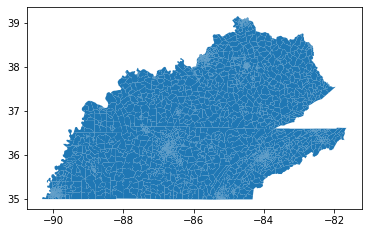

In [32]:
KY_and_TN.plot()

In [78]:
census_tracts['STATEFP'] = pd.to_numeric(
    census_tracts['STATEFP'])

In [82]:

not_all_territories = census_tracts[census_tracts['STATEFP'] <= 56]

In [83]:
not_all_territories

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,34,005,702808,1400000US34005702808,34005702808,7028.08,CT,1510553,0,"POLYGON ((-74.90801 40.03250, -74.90496 40.036..."
1,39,153,504200,1400000US39153504200,39153504200,5042,CT,808151,0,"POLYGON ((-81.51807 41.05957, -81.51805 41.062..."
2,36,071,000502,1400000US36071000502,36071000502,5.02,CT,967431,969216,"POLYGON ((-74.02226 41.49281, -74.02180 41.496..."
3,6,013,370000,1400000US06013370000,6013370000,3700,CT,999356,0,"POLYGON ((-122.32697 37.93502, -122.32610 37.9..."
4,48,113,019204,1400000US48113019204,48113019204,192.04,CT,2851229,9966,"POLYGON ((-96.76902 32.94655, -96.76899 32.950..."
...,...,...,...,...,...,...,...,...,...,...
73862,39,113,040406,1400000US39113040406,39113040406,404.06,CT,13944877,5738,"POLYGON ((-84.21066 39.58867, -84.20976 39.597..."
73863,48,245,011303,1400000US48245011303,48245011303,113.03,CT,155358411,14272444,"POLYGON ((-94.28353 29.88008, -94.26230 29.910..."
73864,1,073,012302,1400000US01073012302,1073012302,123.02,CT,168942340,1269965,"POLYGON ((-87.16295 33.49312, -87.16185 33.495..."
73866,6,081,608023,1400000US06081608023,6081608023,6080.23,CT,805954,119028,"POLYGON ((-122.27898 37.54565, -122.27590 37.5..."


<AxesSubplot:>

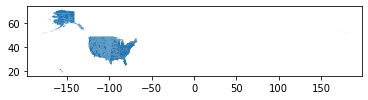

In [84]:
not_all_territories.plot()

In [58]:
censustract_df_merged = census_tracts2019.merge(food_atlas2019, left_on='GEOID', right_on='CensusTract')

In [59]:
censustract_df_merged

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,34,005,702808,1400000US34005702808,34005702808,7028.08,CT,1510553,0,"POLYGON ((-74.90801 40.03250, -74.90496 40.036...",...,482.0,537.0,2403.0,108.0,1.0,9.0,298.0,293.0,30.0,163.0
1,39,153,504200,1400000US39153504200,39153504200,5042,CT,808151,0,"POLYGON ((-81.51807 41.05957, -81.51805 41.062...",...,95.0,1083.0,640.0,92.0,0.0,19.0,143.0,81.0,204.0,260.0
2,36,071,000502,1400000US36071000502,36071000502,5.02,CT,967431,969216,"POLYGON ((-74.02226 41.49281, -74.02180 41.496...",...,249.0,1658.0,1349.0,14.0,0.0,142.0,1415.0,2838.0,473.0,206.0
3,06,013,370000,1400000US06013370000,6013370000,3700,CT,999356,0,"POLYGON ((-122.32697 37.93502, -122.32610 37.9...",...,424.0,1472.0,426.0,509.0,8.0,16.0,406.0,545.0,49.0,33.0
4,48,113,019204,1400000US48113019204,48113019204,192.04,CT,2851229,9966,"POLYGON ((-96.76902 32.94655, -96.76899 32.950...",...,573.0,4909.0,707.0,287.0,5.0,97.0,2219.0,4606.0,32.0,373.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72526,39,113,040406,1400000US39113040406,39113040406,404.06,CT,13944877,5738,"POLYGON ((-84.21066 39.58867, -84.20976 39.597...",...,1059.0,5308.0,128.0,580.0,1.0,8.0,119.0,95.0,12.0,7.0
72527,48,245,011303,1400000US48245011303,48245011303,113.03,CT,155358411,14272444,"POLYGON ((-94.28353 29.88008, -94.26230 29.910...",...,370.0,2469.0,15.0,9.0,0.0,12.0,154.0,241.0,32.0,48.0
72528,01,073,012302,1400000US01073012302,1073012302,123.02,CT,168942340,1269965,"POLYGON ((-87.16295 33.49312, -87.16185 33.495...",...,669.0,3603.0,159.0,1.0,0.0,31.0,35.0,31.0,99.0,130.0
72529,06,081,608023,1400000US06081608023,6081608023,6080.23,CT,805954,119028,"POLYGON ((-122.27898 37.54565, -122.27590 37.5...",...,437.0,1179.0,37.0,1155.0,13.0,3.0,162.0,146.0,23.0,7.0


In [39]:
import json

In [40]:
import altair as alt

In [94]:
food_atlas2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72531 entries, 0 to 72530
Columns: 147 entries, CensusTract to TractSNAP
dtypes: float64(126), int64(19), object(2)
memory usage: 81.3+ MB


In [21]:
kentucky_foodatlas = food_atlas2015[food_atlas2015['State'] == 'Kentucky']

In [22]:
tennessee_foodatlas = food_atlas2015[food_atlas2015['State'] == 'Tennessee']

In [23]:
kyTN_foodatlas = pd.concat([kentucky_foodatlas, tennessee_foodatlas])

In [34]:
KY_and_TN.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
GEOID         object
NAME          object
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [35]:
KY_and_TN['GEOID'] = pd.to_numeric(
    KY_and_TN['GEOID'])

In [36]:
test_df_merged = KY_and_TN.merge(kyTN_foodatlas, left_on='GEOID', right_on='CensusTract')

In [37]:
test_df_merged

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,47,073,050501,47073050501,505.01,Census Tract 505.01,G5020,S,83254353,0,...,580,4043,28,2,0,10,43,26,72,286
1,47,073,050601,47073050601,506.01,Census Tract 506.01,G5020,S,23852262,177934,...,826,5624,161,79,0,10,112,92,147,507
2,47,073,050602,47073050602,506.02,Census Tract 506.02,G5020,S,23376468,668716,...,788,4077,32,36,4,3,60,67,80,199
3,47,073,050502,47073050502,505.02,Census Tract 505.02,G5020,S,32860773,312402,...,545,3224,67,20,0,13,34,30,50,289
4,47,073,050503,47073050503,505.03,Census Tract 505.03,G5020,S,17056873,567717,...,780,4471,70,34,0,10,56,75,34,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,21,133,950402,21133950402,9504.02,Census Tract 9504.02,G5020,S,88523039,497661,...,700,5326,10,13,0,6,25,28,338,544
2608,21,077,960101,21077960101,9601.01,Census Tract 9601.01,G5020,S,175132163,11411489,...,740,5773,105,13,0,9,276,335,139,337
2609,21,035,010600,21035010600,106,Census Tract 106,G5020,S,24203080,83362,...,1567,6281,181,95,4,5,169,142,148,248
2610,21,035,010800,21035010800,108,Census Tract 108,G5020,S,254849039,38864400,...,715,3382,7,6,0,14,49,44,47,205


In [61]:
json_gdf = censustract_df_merged.to_json()
# load as a GeoJSON object.
json_features = json.loads(json_gdf)

In [91]:
#json_features

In [62]:
data_geo = alt.Data(values=json_features['features'])

In [63]:
SNAP_vis = alt.Chart(data_geo).mark_geoshape(

    stroke='white'
).properties(
   
    width=2000,
    height=2000
).encode(
    color= alt.Color('properties.TractSNAP:Q', title = 'SNAP' ))

In [93]:
# SNAP_vis.encode(
#     tooltip=[alt.Tooltip('properties.TractSNAP:N', title='School District'),
# alt.Tooltip('properties.poverty:Q', title='% in poverty')]

# )